In [56]:
word_number = 100000

In [18]:
# filter raw text to contain only valid words
with open('../input.txt', 'r', encoding='utf-8') as f_in:
    with open('input.txt', 'w', encoding='utf-8') as f_out:
        for line in f_in:
            words = [transformed for w in line.split() if (transformed := w.lower().strip('();.,\'"')).isalpha()]
            f_out.write(" ".join(words))

In [ ]:
import pandas as pd
from collections import Counter

In [57]:
word_count = Counter()
head = ""
last_word = ""
with open('input.txt', 'r', encoding="utf-8") as f:
    while len(word_count) < word_number:
        f_read = f.read(2000)
        head += f_read
        data = last_word + f_read
        words = data.split()
        last_word = words.pop()
        word_count.update(words)
        print(len(word_count))

154
290
419
529
672
785
878
998
1132
1266
1377
1498
1598
1699
1800
1904
2004
2116
2227
2326
2421
2521
2614
2707
2805
2882
2950
3039
3108
3184
3287
3377
3460
3539
3630
3716
3791
3869
3946
4028
4094
4155
4220
4296
4365
4435
4514
4573
4679
4773
4861
4945
5022
5114
5213
5293
5370
5444
5530
5626
5722
5814
5917
6001
6064
6136
6206
6257
6324
6398
6467
6534
6604
6687
6760
6829
6892
6956
7023
7100
7154
7221
7283
7359
7439
7510
7580
7634
7697
7765
7824
7888
7955
8028
8111
8183
8239
8307
8384
8448
8518
8571
8631
8691
8753
8802
8862
8915
8959
9010
9073
9135
9185
9231
9292
9365
9438
9514
9593
9662
9738
9800
9870
9935
10009
10081
10143
10216
10281
10345
10413
10488
10559
10642
10718
10785
10848
10916
10988
11063
11122
11175
11248
11313
11381
11444
11507
11572
11641
11704
11765
11830
11898
11965
12023
12089
12159
12227
12301
12368
12443
12511
12585
12669
12724
12773
12826
12885
12941
12994
13060
13117
13177
13223
13262
13308
13364
13435
13485
13528
13570
13610
13659
13706
13754
13810
13850
13898
1395

In [4]:
# zrozumienie 90% tekstu, odcięcie ile wyrazów trzeba znać
# graf z krawędziami, 50, sąsiadów
# plik pdf, kody źródłowe
# filter words

In [7]:
word_count.most_common(20)

[('der', 23159),
 ('die', 18293),
 ('und', 17600),
 ('in', 11657),
 ('von', 8333),
 ('den', 7552),
 ('des', 5872),
 ('mit', 5503),
 ('im', 5118),
 ('das', 5079),
 ('zu', 4714),
 ('als', 4321),
 ('dem', 4288),
 ('ist', 4180),
 ('eine', 4083),
 ('sich', 4055),
 ('auf', 3796),
 ('für', 3633),
 ('auch', 3194),
 ('ein', 3095)]

In [21]:
# create dataframe
df = pd.DataFrame(columns=['rank', 'word', 'count', 'zipf'])

for i, (word, count) in enumerate(word_count.most_common(), start=1):
    zipf = count * i
    df.loc[len(df)] = [i, word, count, zipf]

df = df.set_index('rank')
df.to_csv('data.csv', encoding='utf-8')
print(df)

                    word  count    zipf
rank                                   
1                    der  23159   23159
2                    die  18293   36586
3                    und  17600   52800
4                     in  11657   46628
5                    von   8333   41665
...                  ...    ...     ...
100022  kaufmannsfamilie      1  100022
100023               ter      1  100023
100024            beurze      1  100024
100025            buerze      1  100025
100026            buerse      1  100026

[100026 rows x 3 columns]


In [32]:
# read in dataframe
df = pd.read_csv('data.csv', encoding='utf-8', index_col='rank')
print(df)

                    word  count    zipf
rank                                   
1                    der  23159   23159
2                    die  18293   36586
3                    und  17600   52800
4                     in  11657   46628
5                    von   8333   41665
...                  ...    ...     ...
100022  kaufmannsfamilie      1  100022
100023               ter      1  100023
100024            beurze      1  100024
100025            buerze      1  100025
100026            buerse      1  100026

[100026 rows x 3 columns]


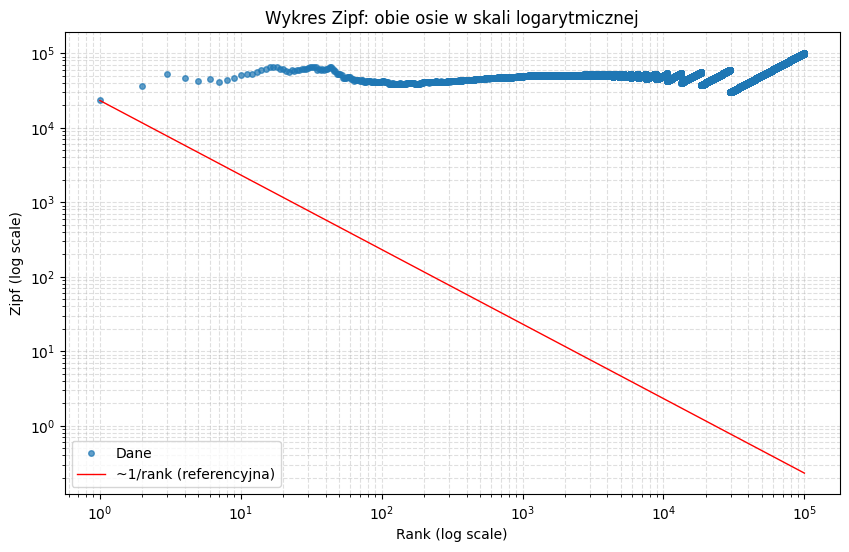

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Przygotuj dane
ranks_arr = np.array(df.index)
zipf_arr = np.array(df.zipf)

plt.figure(figsize=(10, 6))
plt.loglog(ranks_arr, zipf_arr, marker='o', linestyle='none', markersize=4, alpha=0.7, label='Dane')

# Opcjonalna linia referencyjna ~1/rank
if len(ranks_arr) > 0:
    ref = zipf_arr[0] * (ranks_arr[0] / ranks_arr)
    plt.loglog(ranks_arr, ref, color='red', linestyle='-', linewidth=1, label='~1/rank (referencyjna)')

plt.xlabel('Rank (log scale)')
plt.ylabel('Zipf (log scale)')
plt.title('Wykres Zipf: obie osie w skali logarytmicznej')
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.show()

{('aber', 'auch'): 192,
 ('allem', 'vor'): 422,
 ('als', 'auch'): 298,
 ('als', 'die'): 221,
 ('als', 'mehr'): 168,
 ('an', 'den'): 282,
 ('an', 'der'): 615,
 ('an', 'die'): 294,
 ('anderem', 'unter'): 239,
 ('auch', 'der'): 143,
 ('auch', 'die'): 381,
 ('auch', 'in'): 232,
 ('auf', 'das'): 158,
 ('auf', 'dem'): 360,
 ('auf', 'den'): 335,
 ('auf', 'der'): 390,
 ('auf', 'die'): 572,
 ('auf', 'sich'): 152,
 ('aus', 'dem'): 460,
 ('aus', 'den'): 172,
 ('aus', 'der'): 360,
 ('b', 'z'): 385,
 ('bei', 'den'): 220,
 ('bei', 'der'): 449,
 ('beispiel', 'zum'): 225,
 ('bis', 'von'): 234,
 ('bis', 'zu'): 217,
 ('das', 'durch'): 158,
 ('das', 'für'): 229,
 ('das', 'in'): 214,
 ('das', 'ist'): 206,
 ('das', 'und'): 275,
 ('dass', 'die'): 367,
 ('dass', 'so'): 156,
 ('dem', 'in'): 205,
 ('dem', 'mit'): 697,
 ('dem', 'nach'): 270,
 ('dem', 'und'): 268,
 ('dem', 'unter'): 143,
 ('den', 'durch'): 242,
 ('den', 'für'): 395,
 ('den', 'in'): 1286,
 ('den', 'jahren'): 212,
 ('den', 'mit'): 329,
 ('den', 'u

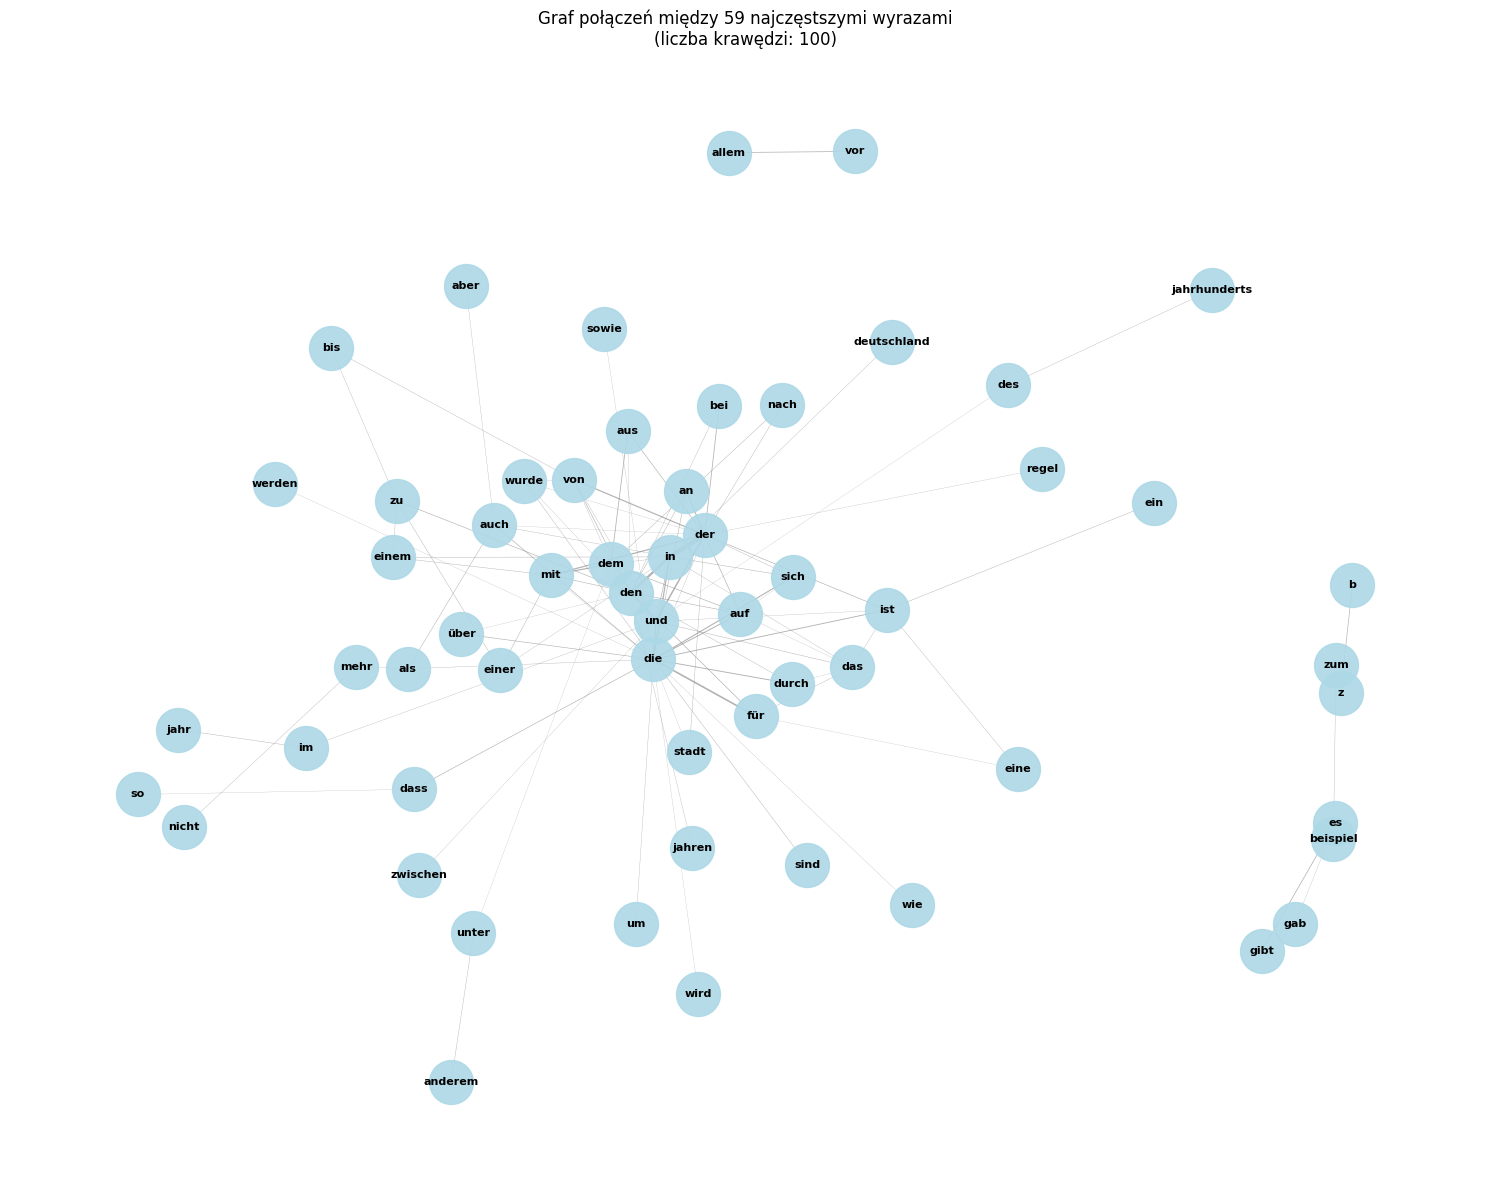


Najczęstsze pary sąsiadujących wyrazów:
der -- in: 2443
den -- in: 1286
die -- und: 963
die -- für: 960
der -- und: 861
der -- mit: 718
dem -- mit: 697
die -- in: 697
der -- von: 695
die -- sich: 638
an -- der: 615
auf -- die: 572
die -- durch: 544
die -- ist: 520
aus -- dem: 460
bei -- der: 449
es -- gibt: 437
allem -- vor: 422
den -- für: 395
auf -- der: 390


In [98]:
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Pobierz 100 najczęstszych par wyrazów
num_of_pairs = 100

# Zbuduj macierz współwystępowania
cooccurrence = defaultdict(int)

words = [word for word in head.split()]

for word1, word2 in zip(words, words[1:]):
    # Połącz sąsiadujące wyrazy
    # Sortuj alfabetycznie, żeby uniknąć duplikatów (a, b) i (b, a)
    if word1 != word2:
        pair = tuple(sorted([word1, word2]))
        cooccurrence[pair] += 1

cooccurrence_reduced = dict(sorted(cooccurrence.items(), key=lambda x: x[1], reverse=True)[:num_of_pairs])
pprint(cooccurrence_reduced)
selected_words = {k[0] for k in cooccurrence_reduced.keys()}.union({k[1] for k in cooccurrence_reduced.keys()})

# Stwórz graf
G = nx.Graph()

# Dodaj węzły
for word in selected_words:
    G.add_node(word)

for (word1, word2), count in cooccurrence_reduced.items():
    G.add_edge(word1, word2, weight=count)

print(f"Graf ma {G.number_of_nodes()} węzłów i {G.number_of_edges()} krawędzi")

# Wizualizacja
plt.figure(figsize=(15, 12))

# Layout - sprawdź różne opcje
pos = nx.spring_layout(G, k=3, iterations=50)

# Rysuj krawędzie z różną grubością
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
max_weight = max(weights) if weights else 1

nx.draw_networkx_edges(G, pos, 
                      width=[w/max_weight * 3 for w in weights],
                      alpha=0.6, edge_color='gray')

# Rysuj węzły
nx.draw_networkx_nodes(G, pos, 
                      node_color='lightblue',
                      node_size=1000,
                      alpha=0.9)

# Rysuj etykiety
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title(f'Graf połączeń między {len(selected_words)} najczęstszymi wyrazami\n(liczba krawędzi: {num_of_pairs})')
plt.axis('off')
plt.tight_layout()
plt.show()

# Pokaż najczęstsze pary
print("\nNajczęstsze pary sąsiadujących wyrazów:")
for pair, count in sorted(cooccurrence_reduced.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{pair[0]} -- {pair[1]}: {count}")